In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [3]:
data1 = pd.read_csv('sort-minRange.csv')
data1.head()

,NORAD_CAT_ID_1,OBJECT_NAME_1,DSE_1,NORAD_CAT_ID_2,OBJECT_NAME_2,DSE_2,TCA,TCA_RANGE,TCA_RELATIVE_SPEED,MAX_PROB,DILUTION
0,52118,STARLINK-3743 [+],1.985,12904,SL-3 R/B [-],2.222,2023-11-06 04:06:55.992,0.031,13.960,0.031010,0.014
1,54799,STARLINK-5421 [+],4.846,30333,FENGYUN 1C DEB [-],5.102,2023-11-09 00:06:12.596,0.032,8.206,0.031750,0.009
2,46280,TRISAT [+],1.238,56210,CONNECTA T2.1 [+],0.956,2023-11-05 03:59:16.503,0.035,15.079,0.001266,0.023
3,53911,STARLINK-5048 [+],3.408,49267,YUNHAI 1-02 DEB [-],3.384,2023-11-07 11:45:57.149,0.035,14.699,0.013180,0.020
4,39084,LANDSAT 8 [+],1.733,37782,CZ-4B R/B [-],2.035,2023-11-05 22:43:28.250,0.046,8.247,0.001769,0.013


In [4]:
data1.columns

Index(['NORAD_CAT_ID_1', 'OBJECT_NAME_1', 'DSE_1', 'NORAD_CAT_ID_2',
       'OBJECT_NAME_2', 'DSE_2', 'TCA', 'TCA_RANGE', 'TCA_RELATIVE_SPEED',
       'MAX_PROB', 'DILUTION'],
      dtype='object')

In [5]:
data1.isnull().sum()

NORAD_CAT_ID_1        0
OBJECT_NAME_1         0
DSE_1                 0
NORAD_CAT_ID_2        0
OBJECT_NAME_2         0
DSE_2                 0
TCA                   0
TCA_RANGE             0
TCA_RELATIVE_SPEED    0
MAX_PROB              0
DILUTION              0
dtype: int64

In [6]:
no_conjunctions = data1.shape[0]
no_conjunctions

67605

Total Number of conjunctions is 67605.

In [7]:
object1 = data1['OBJECT_NAME_1'].unique()
object1

array(['STARLINK-3743 [+]', 'STARLINK-5421 [+]', 'TRISAT [+]', ...,
       'STARLINK-30155 [+]', 'STARLINK-30539 [+]', 'STARLINK-30144 [+]'],
      dtype=object)

In [8]:
len(object1)

7667

In [9]:
object2 = data1['OBJECT_NAME_2'].unique()
object2

array(['SL-3 R/B [-]', 'FENGYUN 1C DEB [-]', 'CONNECTA T2.1 [+]', ...,
       'STARLINK-2391 [+]', 'STARLINK-4190 [+]', 'STARLINK-3460 [+]'],
      dtype=object)

In [10]:
len(object2)

6714

In [11]:
ROS_unique = data1['NORAD_CAT_ID_1'].unique()
ROS_unique



array([52118, 54799, 46280, ..., 57475, 58004, 56835], dtype=int64)

In [12]:
correlation_matrix = data1.corr()
correlation_matrix

,NORAD_CAT_ID_1,DSE_1,NORAD_CAT_ID_2,DSE_2,TCA_RANGE,TCA_RELATIVE_SPEED,MAX_PROB,DILUTION
NORAD_CAT_ID_1,1.000000,-0.007284,-0.020173,-0.027199,-0.000197,-0.024541,0.008055,-0.042280
DSE_1,-0.007284,1.000000,-0.005050,0.776280,0.004136,-0.005674,0.001067,-0.005031
NORAD_CAT_ID_2,-0.020173,-0.005050,1.000000,0.019064,0.009158,-0.020506,-0.002402,-0.026182
DSE_2,-0.027199,0.776280,0.019064,1.000000,0.000666,0.003228,-0.001340,0.007669
TCA_RANGE,-0.000197,0.004136,0.009158,0.000666,1.000000,0.010699,-0.072799,0.691138
TCA_RELATIVE_SPEED,-0.024541,-0.005674,-0.020506,0.003228,0.010699,1.000000,-0.017871,0.580798
MAX_PROB,0.008055,0.001067,-0.002402,-0.001340,-0.072799,-0.017871,1.000000,-0.053531
DILUTION,-0.042280,-0.005031,-0.026182,0.007669,0.691138,0.580798,-0.053531,1.000000


**FREQUENCY OF CONJUNCTIONS**

In [13]:
Frequency_conjunctions_objectID1 = data1['NORAD_CAT_ID_1'].value_counts().reset_index()
Frequency_conjunctions_objectID1.columns = ["NORAD_CAT_ID_1", "Frequency"]

top10_Frequency_conjunctions_objectID1=Frequency_conjunctions_objectID1.head(10)
top10_Frequency_conjunctions_objectID1

,NORAD_CAT_ID_1,Frequency
0,32788,161
1,43884,150
2,43881,138
3,43182,136
4,41855,130
5,43185,129
6,43813,125
7,28220,124
8,43780,123
9,43798,122


In [14]:
Frequency_conjunctions_objectID2 = data1['NORAD_CAT_ID_2'].value_counts().reset_index()
Frequency_conjunctions_objectID2.columns = ["NORAD_CAT_ID_2", "Frequency"]

top10_Frequency_conjunctions_objectID2=Frequency_conjunctions_objectID2.head(10)
top10_Frequency_conjunctions_objectID2

,NORAD_CAT_ID_2,Frequency
0,15331,177
1,47211,141
2,21836,139
3,17191,132
4,56744,132
5,49961,126
6,43801,123
7,42570,121
8,28855,120
9,19573,118


In [15]:
data1['NORAD_CAT_ID_1'][0].dtype

dtype('int64')

NORAD_CAT_ID 32788 (IHOPSAT-TD [+]) has the most number of conjunctions occured; 161 as primary object.

NORAD_CAT_ID 15331 (STARLINK-1752 [+])has the most number of conjunctions occured; 177 as secondary object.

C:\Users\Asus\AppData\Local\Temp/ipykernel_11136/1517914362.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top10_Frequency_conjunctions_objectID1['NORAD_CAT_ID_1'] = top10_Frequency_conjunctions_objectID1['NORAD_CAT_ID_1'].astype(str)


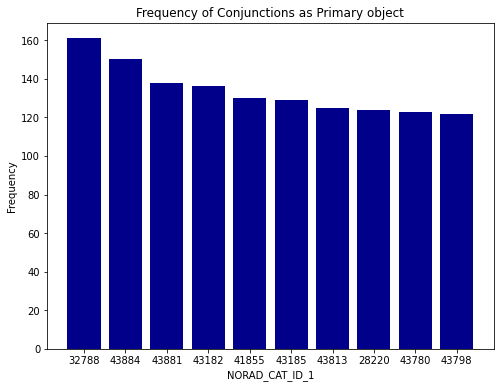

In [16]:

import matplotlib.pyplot as plt

top10_Frequency_conjunctions_objectID1['NORAD_CAT_ID_1'] = top10_Frequency_conjunctions_objectID1['NORAD_CAT_ID_1'].astype(str)

plt.figure(figsize=(8, 6))
plt.bar(top10_Frequency_conjunctions_objectID1['NORAD_CAT_ID_1'], top10_Frequency_conjunctions_objectID1['Frequency'], color='darkblue')

plt.xlabel('NORAD_CAT_ID_1')
plt.ylabel('Frequency')
plt.title('Frequency of Conjunctions as Primary object')

plt.show()


C:\Users\Asus\AppData\Local\Temp/ipykernel_11136/2721833208.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top10_Frequency_conjunctions_objectID2['NORAD_CAT_ID_2'] = top10_Frequency_conjunctions_objectID2['NORAD_CAT_ID_2'].astype(str)


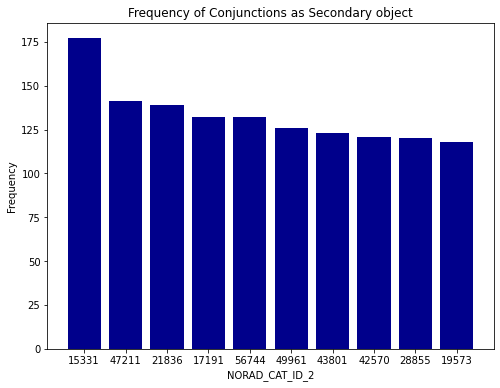

In [17]:
import matplotlib.pyplot as plt

top10_Frequency_conjunctions_objectID2['NORAD_CAT_ID_2'] = top10_Frequency_conjunctions_objectID2['NORAD_CAT_ID_2'].astype(str)

plt.figure(figsize=(8, 6))
plt.bar(top10_Frequency_conjunctions_objectID2['NORAD_CAT_ID_2'], top10_Frequency_conjunctions_objectID2['Frequency'], color='darkblue')

plt.xlabel('NORAD_CAT_ID_2')
plt.ylabel('Frequency')
plt.title('Frequency of Conjunctions as Secondary object')

plt.show()


**CONJUNCTIONS BY TCA RANGE**

In [18]:
TCA_range_ID_grouped = data1.groupby('NORAD_CAT_ID_1').agg({'TCA_RANGE':['min','max']})
TCA_range_ID_grouped 

TCA_RANGE       
                     min    max
NORAD_CAT_ID_1                 
900                1.071  4.953
902                1.719  4.929
1512               1.271  4.789
1520               3.229  4.227
2826               1.062  4.798
...                  ...    ...
58158              2.563  2.563
58161              4.351  4.351
58198              4.518  4.518
58199              1.040  4.694
58201              1.290  4.663

[7803 rows x 2 columns]

In [19]:
avg_TCA_RANGE_ID1 = data1.groupby('NORAD_CAT_ID_1')['TCA_RANGE'].mean()

print(avg_TCA_RANGE_ID1)

NORAD_CAT_ID_1
900      3.053444
902      3.698250
1512     3.313800
1520     3.647000
2826     3.404316
           ...   
58158    2.563000
58161    4.351000
58198    4.518000
58199    2.738857
58201    3.071429
Name: TCA_RANGE, Length: 7803, dtype: float64


In [20]:
avg_TCA_RANGE_ID1_df = pd.DataFrame(avg_TCA_RANGE_ID1.values, avg_TCA_RANGE_ID1.index)
avg_TCA_RANGE_ID1_df.columns= ['Average TCA Range']

In [21]:
avg_TCA_RANGE_ID1_df

,Average TCA Range
NORAD_CAT_ID_1,
900,3.053444
902,3.698250
1512,3.313800
1520,3.647000
2826,3.404316
...,...
58158,2.563000
58161,4.351000
58198,4.518000


In [22]:
avg_TCA_RANGE_ID1_df = avg_TCA_RANGE_ID1_df.sort_values(by=['Average TCA Range'], ascending=False)
avg_TCA_RANGE_ID1_df

,Average TCA Range
NORAD_CAT_ID_1,
56835,4.999
58004,4.997
57475,4.997
58130,4.988
52173,4.983
...,...
54677,0.667
52011,0.574
58070,0.481


**TOP 10 RSOs WITH HIGHEST AVERAGE TCA RANGE**

In [23]:
highest_avg_TCA_RANGE_ID1_df = avg_TCA_RANGE_ID1_df.head(10)
highest_avg_TCA_RANGE_ID1_df

,Average TCA Range
NORAD_CAT_ID_1,
56835,4.9990
58004,4.9970
57475,4.9970
58130,4.9880
52173,4.9830
57329,4.9765
49283,4.9760
48894,4.9740
57906,4.9710


**RSOs WHICH HAVE LOWEST AVERAGE TCA RANGE**

In [24]:
lowest_avg_TCA_RANGE_ID1_df = avg_TCA_RANGE_ID1_df.tail(10)
lowest_avg_TCA_RANGE_ID1_df

,Average TCA Range
NORAD_CAT_ID_1,
32954,0.795
55701,0.794
57420,0.789
53148,0.718
54654,0.694
54677,0.667
52011,0.574
58070,0.481
46819,0.446


**SATELITE CONJUNCTION PROBABILITY**

In [25]:
max_prob_per_object_name_1_object_name_2 = data1.groupby(['OBJECT_NAME_1', 'OBJECT_NAME_2'])['MAX_PROB'].max()

pd.DataFrame(max_prob_per_object_name_1_object_name_2).head(20)

MAX_PROB
OBJECT_NAME_1            OBJECT_NAME_2                      
3B5GSAT (SATELIOT 1) [+] ASTROCAST-0304 [+]     1.107000e-07
                         CZ-2D DEB [-]          1.883000e-07
                         FLOCK 4X-16 [+]        7.378000e-08
                         FLOCK 4X-22 [+]        3.429000e-08
                         FLOCK 4X-3 [+]         4.537000e-07
                         FLOCK 4X-34 [+]        9.523000e-07
                         LEMUR-2-HANCOM-1 [+]   1.822000e-07
                         OBJECT B [+]           1.572000e-07
                         OBJECT BG [-]          8.211000e-06
                         OBJECT C [+]           7.683000e-08
                         OBJECT D [+]           3.713000e-07
                         OBJECT S [+]           4.010000e-06
                         PEGASUS R/B [-]        5.213000e-07
                         PSLV DEB [-]           1.728000e-07
                         SAPLING GIGANTEUM [+]  6.116000e-07
                         SL-16 DEB [-]          1.195000e-07
                         TEVEL-7 [+]            3.381000e-06
                         TEVEL-8 [+]            2.403000e-07
                         TRSI-3 [+]             3.925000e-07
                         YUNYAO-1 06 [+]        2.000000e-07

****DATAFRAME WITH DESCENDING ORDER OF MAXIMUM PROBABILITY OF CONJUNCTION****

In [26]:
max_prob_per_object_name_1_object_name_2_sorted = max_prob_per_object_name_1_object_name_2.sort_values(ascending=False)
max_prob_per_object_name_1_object_name_2_sorted_df = pd.DataFrame(max_prob_per_object_name_1_object_name_2_sorted).reset_index()
max_prob_per_object_name_1_object_name_2_sorted_df.head()


,OBJECT_NAME_1,OBJECT_NAME_2,MAX_PROB
0,STARLINK-5421 [+],FENGYUN 1C DEB [-],0.031750
1,STARLINK-3743 [+],SL-3 R/B [-],0.031010
2,STARLINK-3954 [+],STARLINK-2715 [-],0.016710
3,STARLINK-5048 [+],YUNHAI 1-02 DEB [-],0.013180
4,STARLINK-30055 [P],STARLINK-30064 [P],0.009577


**conjunction scenarios with the highest probability of collision**

In [27]:
top_prob_conjunctions_df = max_prob_per_object_name_1_object_name_2_sorted_df.head(10).reset_index()
top_prob_conjunctions_df

,index,OBJECT_NAME_1,OBJECT_NAME_2,MAX_PROB
0,0,STARLINK-5421 [+],FENGYUN 1C DEB [-],0.031750
1,1,STARLINK-3743 [+],SL-3 R/B [-],0.031010
2,2,STARLINK-3954 [+],STARLINK-2715 [-],0.016710
3,3,STARLINK-5048 [+],YUNHAI 1-02 DEB [-],0.013180
4,4,STARLINK-30055 [P],STARLINK-30064 [P],0.009577
5,5,STARLINK-1961 [+],STARLINK-2025 [P],0.009289
6,6,STARLINK-30083 [P],STARLINK-6229 [+],0.005098
7,7,STARLINK-5920 [+],STARLING 4 [+],0.004873
8,8,LEMUR-2-THENICKMOLO [+],STARLINK-4110 [+],0.004365
9,9,STARLINK-5932 [+],RAPIDEYE 1 [-],0.004041


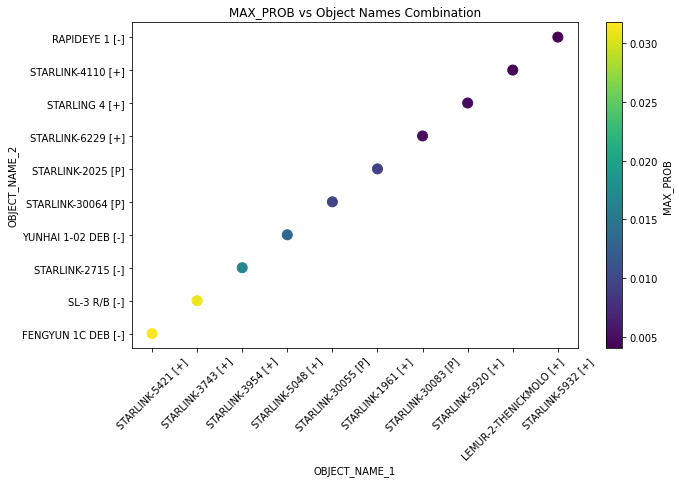

In [28]:
plt.figure(figsize=(10, 6))
plt.scatter(top_prob_conjunctions_df['OBJECT_NAME_1'], top_prob_conjunctions_df['OBJECT_NAME_2'],c = top_prob_conjunctions_df['MAX_PROB'] ,cmap='viridis', s=100)
plt.colorbar(label='MAX_PROB')
plt.xlabel('OBJECT_NAME_1')
plt.ylabel('OBJECT_NAME_2')
plt.title('MAX_PROB vs Object Names Combination')
plt.xticks(rotation=45)
plt.show()

**conjunction scenarios with the lowest probability of collision**

In [29]:
low_prob_conjunctions_df = max_prob_per_object_name_1_object_name_2_sorted_df.tail(10).reset_index()
low_prob_conjunctions_df

,index,OBJECT_NAME_1,OBJECT_NAME_2,MAX_PROB
0,54507,FLOCK 4S-4 [+],OBJECT Y [-],3.163000e-08
1,54508,FLOCK 4X-35 [+],ROSEYCUBESAT-1 [+],3.152000e-08
2,54509,IRIDIUM 109 [+],PACSAT (AO-16) [-],3.136000e-08
3,54510,CALSPHERE 2 [+],COSMOS 1275 DEB [-],3.105000e-08
4,54511,LUSAT (LO-19) [P],IRIDIUM 110 [+],3.088000e-08
5,54512,IRIDIUM 114 [+],PACSAT (AO-16) [-],3.081000e-08
6,54513,FLOCK 4V-20 [+],FLOCK 4S-7 [+],2.999000e-08
7,54514,OSCAR 7 (AO-7) [P],COSMOS 340 [?],2.991000e-08
8,54515,FLOCK 4S-9 [+],FLOCK 4X-29 [+],2.951000e-08
9,54516,OPS 5712 (P/L 160) [+],SARA [?],2.788000e-08


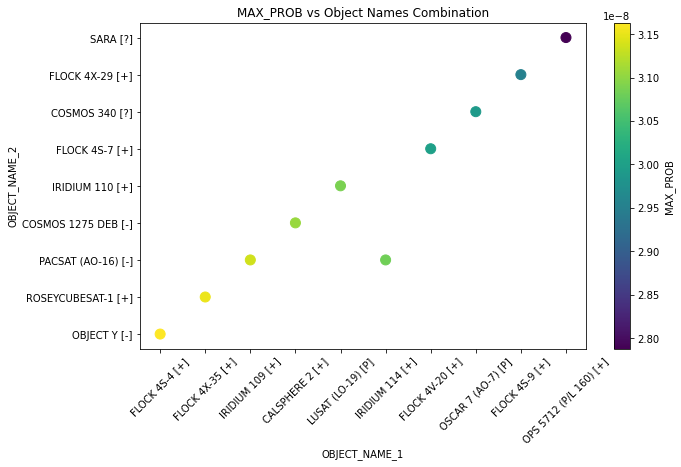

In [30]:
plt.figure(figsize=(10, 6))
plt.scatter(low_prob_conjunctions_df['OBJECT_NAME_1'], low_prob_conjunctions_df['OBJECT_NAME_2'],c = low_prob_conjunctions_df['MAX_PROB'] ,cmap='viridis', s=100)
plt.colorbar(label='MAX_PROB')
plt.xlabel('OBJECT_NAME_1')
plt.ylabel('OBJECT_NAME_2')
plt.title('MAX_PROB vs Object Names Combination')
plt.xticks(rotation=45)
plt.show()

STARLINK-5421 - FENGYUN 1C DEB has the highest probability of conjunction with a probability of 0.031750.
OPS 5712 (P/L 160) - 	OPS 5712 (P/L 160) has the  lowest probaility of conjunction with  a probability of 2.788000e-08.

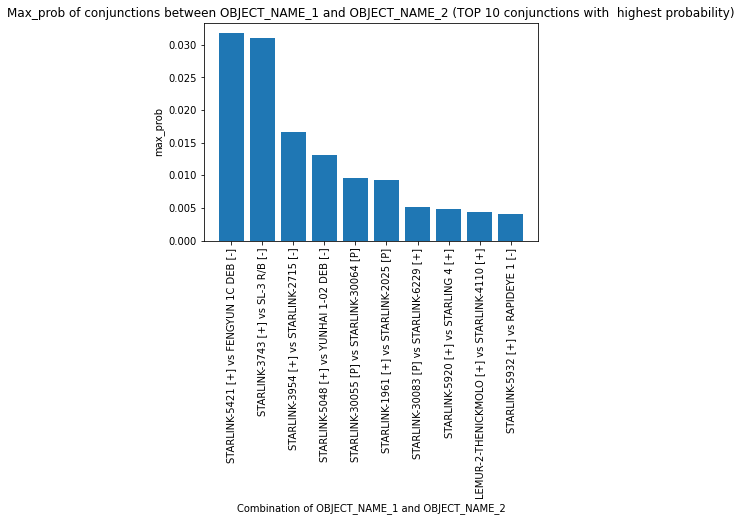

In [31]:
max_prob = top_prob_conjunctions_df['MAX_PROB']

bar_names = top_prob_conjunctions_df['OBJECT_NAME_1'].map(str) + ' vs ' + top_prob_conjunctions_df['OBJECT_NAME_2'].map(str)

plt.bar(bar_names, max_prob)
plt.xlabel("Combination of OBJECT_NAME_1 and OBJECT_NAME_2")
plt.ylabel("max_prob")
plt.title("Max_prob of conjunctions between OBJECT_NAME_1 and OBJECT_NAME_2 (TOP 10 conjunctions with  highest probability)")
plt.xticks(rotation=90)
plt.show()

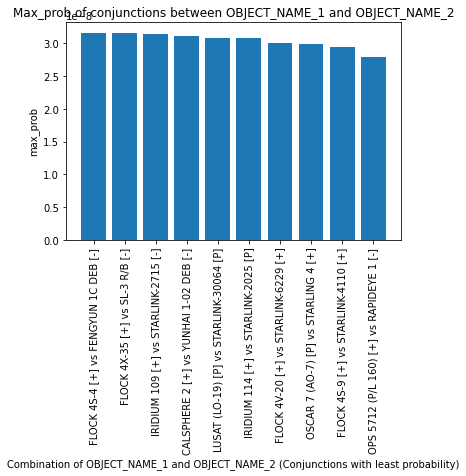

In [32]:
max_prob = low_prob_conjunctions_df['MAX_PROB']

bar_names = low_prob_conjunctions_df['OBJECT_NAME_1'].map(str) + ' vs ' + top_prob_conjunctions_df['OBJECT_NAME_2'].map(str)

plt.bar(bar_names, max_prob)
plt.xlabel("Combination of OBJECT_NAME_1 and OBJECT_NAME_2 (Conjunctions with least probability)")
plt.ylabel("max_prob")
plt.title("Max_prob of conjunctions between OBJECT_NAME_1 and OBJECT_NAME_2")
plt.xticks(rotation=90)
plt.show()

In [33]:
data2 = pd.read_csv("satcat.csv")
data2.head()

,OBJECT_NAME,OBJECT_ID,NORAD_CAT_ID,OBJECT_TYPE,OPS_STATUS_CODE,OWNER,LAUNCH_DATE,LAUNCH_SITE,DECAY_DATE,PERIOD,INCLINATION,APOGEE,PERIGEE,RCS,DATA_STATUS_CODE,ORBIT_CENTER,ORBIT_TYPE
0,SL-1 R/B,1957-001A,1,R/B,D,CIS,10/4/1957,TYMSC,12/1/1957,96.19,65.10,938.0,214.0,20.420,NaN,EA,IMP
1,SPUTNIK 1,1957-001B,2,PAY,D,CIS,10/4/1957,TYMSC,1/3/1958,96.10,65.00,1080.0,64.0,NaN,NaN,EA,IMP
2,SPUTNIK 2,1957-002A,3,PAY,D,CIS,11/3/1957,TYMSC,4/14/1958,103.74,65.33,1659.0,211.0,0.080,NaN,EA,IMP
3,EXPLORER 1,1958-001A,4,PAY,D,US,2/1/1958,AFETR,3/31/1970,88.48,33.15,215.0,183.0,NaN,NaN,EA,IMP
4,VANGUARD 1,1958-002B,5,PAY,NaN,US,3/17/1958,AFETR,NaN,132.71,34.25,3829.0,651.0,0.122,NaN,EA,ORB


In [34]:
data2.isnull().sum()

OBJECT_NAME             0
OBJECT_ID               0
NORAD_CAT_ID            0
OBJECT_TYPE             0
OPS_STATUS_CODE     17623
OWNER                   0
LAUNCH_DATE             0
LAUNCH_SITE             0
DECAY_DATE          28084
PERIOD                881
INCLINATION           881
APOGEE                881
PERIGEE               881
RCS                 25187
DATA_STATUS_CODE    57005
ORBIT_CENTER            0
ORBIT_TYPE              0
dtype: int64

In [36]:
merged_data = pd.merge(data1,data2,left_on = 'NORAD_CAT_ID_1', right_on = 'NORAD_CAT_ID', how = 'left')
merged_data.head()

,NORAD_CAT_ID_1,OBJECT_NAME_1,DSE_1,NORAD_CAT_ID_2,OBJECT_NAME_2,DSE_2,TCA,TCA_RANGE,TCA_RELATIVE_SPEED,MAX_PROB,...,LAUNCH_SITE,DECAY_DATE,PERIOD,INCLINATION,APOGEE,PERIGEE,RCS,DATA_STATUS_CODE,ORBIT_CENTER,ORBIT_TYPE
0,52118,STARLINK-3743 [+],1.985,12904,SL-3 R/B [-],2.222,2023-11-06 04:06:55.992,0.031,13.960,0.031010,...,AFETR,NaN,95.44,53.22,541.0,538.0,NaN,NaN,EA,ORB
1,54799,STARLINK-5421 [+],4.846,30333,FENGYUN 1C DEB [-],5.102,2023-11-09 00:06:12.596,0.032,8.206,0.031750,...,AFETR,NaN,95.44,53.22,541.0,538.0,NaN,NaN,EA,ORB
2,46280,TRISAT [+],1.238,56210,CONNECTA T2.1 [+],0.956,2023-11-05 03:59:16.503,0.035,15.079,0.001266,...,FRGUI,NaN,94.19,97.38,481.0,478.0,NaN,NaN,EA,ORB
3,53911,STARLINK-5048 [+],3.408,49267,YUNHAI 1-02 DEB [-],3.384,2023-11-07 11:45:57.149,0.035,14.699,0.013180,...,AFETR,NaN,95.44,53.22,541.0,539.0,NaN,NaN,EA,ORB
4,39084,LANDSAT 8 [+],1.733,37782,CZ-4B R/B [-],2.035,2023-11-05 22:43:28.250,0.046,8.247,0.001769,...,AFWTR,NaN,98.83,98.21,703.0,702.0,7.1149,NaN,EA,ORB


In [37]:
def get_top_and_least_conjunctions():
    top_10_conjunctions = merged_data.nlargest(10, 'MAX_PROB')[['OBJECT_NAME_1', 'OBJECT_NAME_2', 'MAX_PROB']]
    least_10_conjunctions = merged_data.nsmallest(10, 'MAX_PROB')[['OBJECT_NAME_1', 'OBJECT_NAME_2', 'MAX_PROB']]

    return top_10_conjunctions, least_10_conjunctions

top_10, least_10 = get_top_and_least_conjunctions()

print("Top 10 Max Probability Conjunctions:")
print(top_10)

print("\nLeast 10 Max Probability Conjunctions:")
print(least_10)


Top 10 Max Probability Conjunctions:
                OBJECT_NAME_1        OBJECT_NAME_2  MAX_PROB
1           STARLINK-5421 [+]   FENGYUN 1C DEB [-]  0.031750
0           STARLINK-3743 [+]         SL-3 R/B [-]  0.031010
12          STARLINK-3954 [+]    STARLINK-2715 [-]  0.016710
3           STARLINK-5048 [+]  YUNHAI 1-02 DEB [-]  0.013180
109        STARLINK-30055 [P]   STARLINK-30064 [P]  0.009577
6425       STARLINK-30055 [P]   STARLINK-30064 [P]  0.009577
24          STARLINK-1961 [+]    STARLINK-2025 [P]  0.009289
52         STARLINK-30083 [P]    STARLINK-6229 [+]  0.005098
5           STARLINK-5920 [+]       STARLING 4 [+]  0.004873
6     LEMUR-2-THENICKMOLO [+]    STARLINK-4110 [+]  0.004365

Least 10 Max Probability Conjunctions:
                OBJECT_NAME_1        OBJECT_NAME_2      MAX_PROB
35108         FLOCK 4Y-16 [+]      FLOCK 4Y-27 [+]  2.570000e-08
65601         CALSPHERE 2 [+]   FENGYUN 1C DEB [-]  2.588000e-08
63713              STELLA [+]   FENGYUN 1C DEB [-]  2.632

**Owners of satelites with most number of conjunctions**

In [53]:
owner_frequency = merged_data['OWNER'].value_counts().reset_index()
owner_frequency_df = pd.DataFrame(owner_frequency)
owner_frequency.head()

,index,OWNER
0,US,42669
1,PRC,8001
2,UK,2524
3,CIS,2318
4,GER,1585


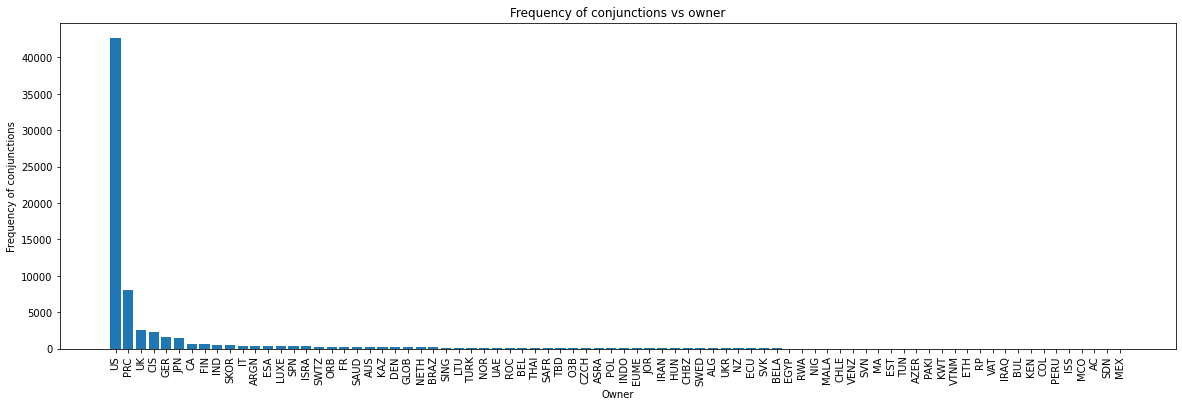

In [64]:
plt.figure(figsize=(20, 6))
plt.bar(owner_frequency['index'], owner_frequency['OWNER'])
plt.xlabel("Owner")
plt.ylabel("Frequency of conjunctions")
plt.title("Frequency of conjunctions vs owner")
plt.xticks(rotation=90)
plt.show()

The satelites under the ownership of US have involved in most number of conjunctions.

**ANALYSIS OF CONJUNCTIONS IN A SINGLE DAY**

In [38]:
def analyze_single_day_conjunctions(target_date, NORAD_ID=None):

    merged_data['TCA'] = pd.to_datetime(merged_data['TCA'])

    data_for_single_day = merged_data[merged_data['TCA'].dt.date == pd.to_datetime(target_date).date()]

    total_conjunctions_single_day = len(data_for_single_day)

    if NORAD_ID is not None:
        data_for_single_day = data_for_single_day[
            (data_for_single_day['NORAD_CAT_ID_1'] == NORAD_ID) |
            (data_for_single_day['NORAD_CAT_ID_2'] == NORAD_ID)
        ]

    max_prob_conjunction = data_for_single_day.loc[data_for_single_day['MAX_PROB'].idxmax()]
    max_prob = max_prob_conjunction['MAX_PROB']
    object_1 = max_prob_conjunction['OBJECT_NAME_1']
    object_2 = max_prob_conjunction['OBJECT_NAME_2']

    return {
        'Date': target_date,
        'Total Conjunctions': total_conjunctions_single_day,
        'Max Probability Conjunction': {
            'Object 1': object_1,
            'Object 2': object_2,
            'Max Probability': max_prob
        }
    }

target_date = '2023-11-08'
analytics = analyze_single_day_conjunctions(target_date)
print(analytics)


{'Date': '2023-11-08', 'Total Conjunctions': 9419, 'Max Probability Conjunction': {'Object 1': 'SHIYAN 1 (SY-1) [+]', 'Object 2': 'STARLINK-1194 [+]', 'Max Probability': 0.003649}}


**B**

# **ANALYSIS OF STARLINK SATELITES**

In [39]:
starlink_data = data1[data1['OBJECT_NAME_1'].str.contains('STARLINK') | data1['OBJECT_NAME_2'].str.contains('STARLINK')]
starlink_data 

,NORAD_CAT_ID_1,OBJECT_NAME_1,DSE_1,NORAD_CAT_ID_2,OBJECT_NAME_2,DSE_2,TCA,TCA_RANGE,TCA_RELATIVE_SPEED,MAX_PROB,DILUTION
0,52118,STARLINK-3743 [+],1.985,12904,SL-3 R/B [-],2.222,2023-11-06 04:06:55.992,0.031,13.960,3.101000e-02,0.014
1,54799,STARLINK-5421 [+],4.846,30333,FENGYUN 1C DEB [-],5.102,2023-11-09 00:06:12.596,0.032,8.206,3.175000e-02,0.009
3,53911,STARLINK-5048 [+],3.408,49267,YUNHAI 1-02 DEB [-],3.384,2023-11-07 11:45:57.149,0.035,14.699,1.318000e-02,0.020
5,55935,STARLINK-5920 [+],1.467,57386,STARLING 4 [+],1.771,2023-11-05 15:51:05.854,0.053,15.078,4.873000e-03,0.036
6,43185,LEMUR-2-THENICKMOLO [+],0.668,53166,STARLINK-4110 [+],1.220,2023-11-04 19:59:51.126,0.062,14.570,4.365000e-03,0.034
...,...,...,...,...,...,...,...,...,...,...,...
67600,55659,STARLINK-5477 [+],1.021,33706,FENGYUN 1C DEB [-],2.105,2023-11-05 01:31:03.247,5.000,14.578,6.731000e-07,2.783
67601,55784,STARLINK-5797 [+],1.405,6063,SL-8 DEB [-],1.403,2023-11-05 03:50:56.691,5.000,0.561,1.588000e-06,1.179
67602,55790,STARLINK-5813 [+],7.037,37085,COSMOS 2251 DEB [-],7.553,2023-11-10 23:25:23.274,5.000,14.198,7.493000e-07,2.500
67603,56545,STARLINK-6086 [+],3.277,29753,FENGYUN 1C DEB [-],3.146,2023-11-07 09:05:34.114,5.000,12.975,1.046000e-07,1.988


**PERCENTAGE OF CONJUNCTIONS INVOLVING STARLINK SATELLITES**

In [40]:
starlink_percentage = len(starlink_data)/len(data1)
starlink_percentage


0.6302344501146365

***Starlink satelites involves in 63.02% of total conjunctions***

In [41]:
def extract_constellation_name(obj_name):
    return obj_name.split(' ')[0].split('-')[0]

data1['Constellation_1'] = data1['OBJECT_NAME_1'].apply(extract_constellation_name)
data1['Constellation_2'] = data1['OBJECT_NAME_2'].apply(extract_constellation_name)
data1[['Constellation_1', 'Constellation_2']]


,Constellation_1,Constellation_2
0,STARLINK,SL
1,STARLINK,FENGYUN
2,TRISAT,CONNECTA
3,STARLINK,YUNHAI
4,LANDSAT,CZ
...,...,...
67600,STARLINK,FENGYUN
67601,STARLINK,SL
67602,STARLINK,COSMOS
67603,STARLINK,FENGYUN


In [42]:
data1.head()

,NORAD_CAT_ID_1,OBJECT_NAME_1,DSE_1,NORAD_CAT_ID_2,OBJECT_NAME_2,DSE_2,TCA,TCA_RANGE,TCA_RELATIVE_SPEED,MAX_PROB,DILUTION,Constellation_1,Constellation_2
0,52118,STARLINK-3743 [+],1.985,12904,SL-3 R/B [-],2.222,2023-11-06 04:06:55.992,0.031,13.960,0.031010,0.014,STARLINK,SL
1,54799,STARLINK-5421 [+],4.846,30333,FENGYUN 1C DEB [-],5.102,2023-11-09 00:06:12.596,0.032,8.206,0.031750,0.009,STARLINK,FENGYUN
2,46280,TRISAT [+],1.238,56210,CONNECTA T2.1 [+],0.956,2023-11-05 03:59:16.503,0.035,15.079,0.001266,0.023,TRISAT,CONNECTA
3,53911,STARLINK-5048 [+],3.408,49267,YUNHAI 1-02 DEB [-],3.384,2023-11-07 11:45:57.149,0.035,14.699,0.013180,0.020,STARLINK,YUNHAI
4,39084,LANDSAT 8 [+],1.733,37782,CZ-4B R/B [-],2.035,2023-11-05 22:43:28.250,0.046,8.247,0.001769,0.013,LANDSAT,CZ


In [43]:
constellation_1_unique = data1['Constellation_1'].unique()
constellation_1_unique

array(['STARLINK', 'TRISAT', 'LANDSAT', 'LEMUR', 'GHGSAT', 'OBJECT',
       'SHIYAN', 'YAOGAN', 'IRIDIUM', 'ASTROCAST', 'XIAOXIANG', 'KSF3',
       'SJ', 'FLOCK', 'RAVAN', 'NETSAT', 'ONEWEB', 'COSMOS', 'SITRO',
       'SPACEBEE', 'YUNHAI', 'CYGFM02', 'PAZ', 'RANGE', 'MATS', 'PCSAT',
       'OPTICUBE', 'HIBARI', 'POLAR', 'TOMORROW', 'R2', 'SURCAL',
       'MONITOR', 'BUFENG', 'GCOM', 'SKYKRAFT', 'CSIM', 'NORBI', 'JILIN',
       'GOSAT', 'CSTP', 'STORK', 'ORBCOMM', 'HAIYANG', 'TIANQIN', 'ENMAP',
       'JB', 'KSM1', 'IRIS', 'GLOBALSTAR', 'UWE', 'SALSAT', 'CUBESX',
       'LING', 'MOMENTUS', 'AL', 'TIANHUI', 'SNUGLITE', 'SATELIOT_0',
       'KAZSCISAT', 'AFR', 'BIROS', 'LUMELITE', 'APRIZESAT', 'ORBICRAFT',
       'GAMA', 'KEPLER', 'NEE', 'CELTEE', 'NORSAT', 'FENGYUN', 'JAISAT',
       'SENTINEL', 'CAS500', 'NEUSAR', 'NANOSATC', 'XW', 'GNOMES', 'STEP',
       'LABSAT', 'STRIX', 'EXACTVIEW', 'GRACE', 'VDNH', 'BY70',
       'CORIOLIS', 'PAYLOAD', 'VZLUSAT', 'HIBER', 'SINAH', 'OTB', 'HAWK',
 

In [44]:
constellation_2_unique = data1['Constellation_2'].unique()
constellation_2_unique

array(['SL', 'FENGYUN', 'CONNECTA', 'YUNHAI', 'CZ', 'STARLING',
       'STARLINK', 'ICEYE', 'FLOCK', 'OBJECT', 'RAPIDEYE', 'YAOGAN', 'H',
       'COSMOS', 'NOAA', 'ELECTRON', 'TIANHUI', 'TYVAK', 'PSLV', 'HAWK',
       'UPMSAT', 'HORS', 'THOR', 'LEMUR', 'ARIANE', 'BREEZE', 'STRATOSAT',
       'THORAD', 'ORBVIEW', 'SITRO', 'AIST', 'UNKNOWN', 'DELTA', 'HIBARI',
       'HETE', 'STRIX', 'QASED', 'IRIDIUM', 'OPS', 'SZ', 'BUFENG',
       'TITAN', 'IRVINE02', 'GAOFEN', 'SLS', 'ORBCOMM', 'SNIPE', 'KSLV',
       'FACSAT', 'AAC', 'RAX', 'DMSP', 'IRIS', 'AISTECHSAT', 'ION',
       'FALCON', 'CUBESX', 'NETSAT', 'UMKA', 'PEGASUS', 'KUWAITSAT',
       'CUSAT', 'DUMMY', 'FOSSASA', 'GSLV', 'MKA', 'NEXTSAT', 'TELEOS',
       'NUSAT', 'INSPIRESAT', 'ANSER', 'DRAGRACER', 'CBERS', 'MONITOR',
       'PLANETUM1', 'ASAP', 'WESTFORD', 'KSF2', 'CSTP', 'CERISE',
       'ONEWEB', 'KIRARI', 'MINOTAUR', 'SPACEBEE', 'DIAMANT', 'FREGAT',
       'JILIN', 'PUCP', 'SVYATOBOR', 'SHIYAN', 'RESURS', 'TIANMU', 'XSS',
      

In [45]:
constellation_counts_1 = data1['Constellation_1'].value_counts()

constellation_counts_2 = data1['Constellation_2'].value_counts()

print("Counts in Constellation_1:")
print(constellation_counts_1)

print("\nCounts in Constellation_2:")
print(constellation_counts_2)

Counts in Constellation_1:
STARLINK      30984
ONEWEB         2138
LEMUR          2042
IRIDIUM        2008
OBJECT         1572
              ...  
NASA              1
LUCH              1
PAINANI           1
CYGNUS            1
SHAKUNTALA        1
Name: Constellation_1, Length: 724, dtype: int64

Counts in Constellation_2:
STARLINK      12157
OBJECT         8146
COSMOS         7499
FENGYUN        5023
CZ             4370
              ...  
TRITON            1
WEOS              1
RESHUCUBE         1
PROMETHEUS        1
MP42              1
Name: Constellation_2, Length: 760, dtype: int64


In [46]:
total_entries = len(data1)

percentage_constellation_1 = (constellation_counts_1 / total_entries) * 100

percentage_constellation_2 = (constellation_counts_2 / total_entries) * 100

print("Percentage in Constellation_1:")
print(percentage_constellation_1)

print("\nPercentage in Constellation_2:")
print(percentage_constellation_2)

Percentage in Constellation_1:
STARLINK      45.830930
ONEWEB         3.162488
LEMUR          3.020487
IRIDIUM        2.970195
OBJECT         2.325272
                ...    
NASA           0.001479
LUCH           0.001479
PAINANI        0.001479
CYGNUS         0.001479
SHAKUNTALA     0.001479
Name: Constellation_1, Length: 724, dtype: float64

Percentage in Constellation_2:
STARLINK      17.982398
OBJECT        12.049405
COSMOS        11.092375
FENGYUN        7.429924
CZ             6.464019
                ...    
TRITON         0.001479
WEOS           0.001479
RESHUCUBE      0.001479
PROMETHEUS     0.001479
MP42           0.001479
Name: Constellation_2, Length: 760, dtype: float64


**Starlink satelites involves 45.8% of total conjunctions as a primary object and 17.9% as a secondary object.**

# Time series analysis

In [47]:
merged_data['TCA'] = pd.to_datetime(merged_data['TCA'])
merged_data['LAUNCH_DATE'] = pd.to_datetime(merged_data['LAUNCH_DATE'])
merged_data['DECAY_DATE'] = pd.to_datetime(merged_data['DECAY_DATE'])

In [48]:
merged_data

,NORAD_CAT_ID_1,OBJECT_NAME_1,DSE_1,NORAD_CAT_ID_2,OBJECT_NAME_2,DSE_2,TCA,TCA_RANGE,TCA_RELATIVE_SPEED,MAX_PROB,...,LAUNCH_SITE,DECAY_DATE,PERIOD,INCLINATION,APOGEE,PERIGEE,RCS,DATA_STATUS_CODE,ORBIT_CENTER,ORBIT_TYPE
0,52118,STARLINK-3743 [+],1.985,12904,SL-3 R/B [-],2.222,2023-11-06 04:06:55.992,0.031,13.960,3.101000e-02,...,AFETR,NaT,95.44,53.22,541.0,538.0,NaN,NaN,EA,ORB
1,54799,STARLINK-5421 [+],4.846,30333,FENGYUN 1C DEB [-],5.102,2023-11-09 00:06:12.596,0.032,8.206,3.175000e-02,...,AFETR,NaT,95.44,53.22,541.0,538.0,NaN,NaN,EA,ORB
2,46280,TRISAT [+],1.238,56210,CONNECTA T2.1 [+],0.956,2023-11-05 03:59:16.503,0.035,15.079,1.266000e-03,...,FRGUI,NaT,94.19,97.38,481.0,478.0,NaN,NaN,EA,ORB
3,53911,STARLINK-5048 [+],3.408,49267,YUNHAI 1-02 DEB [-],3.384,2023-11-07 11:45:57.149,0.035,14.699,1.318000e-02,...,AFETR,NaT,95.44,53.22,541.0,539.0,NaN,NaN,EA,ORB
4,39084,LANDSAT 8 [+],1.733,37782,CZ-4B R/B [-],2.035,2023-11-05 22:43:28.250,0.046,8.247,1.769000e-03,...,AFWTR,NaT,98.83,98.21,703.0,702.0,7.1149,NaN,EA,ORB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67600,55659,STARLINK-5477 [+],1.021,33706,FENGYUN 1C DEB [-],2.105,2023-11-05 01:31:03.247,5.000,14.578,6.731000e-07,...,AFWTR,NaT,96.11,70.00,574.0,570.0,NaN,NaN,EA,ORB
67601,55784,STARLINK-5797 [+],1.405,6063,SL-8 DEB [-],1.403,2023-11-05 03:50:56.691,5.000,0.561,1.588000e-06,...,AFWTR,NaT,96.11,70.00,574.0,570.0,NaN,NaN,EA,ORB
67602,55790,STARLINK-5813 [+],7.037,37085,COSMOS 2251 DEB [-],7.553,2023-11-10 23:25:23.274,5.000,14.198,7.493000e-07,...,AFWTR,NaT,96.11,70.00,574.0,570.0,NaN,NaN,EA,ORB
67603,56545,STARLINK-6086 [+],3.277,29753,FENGYUN 1C DEB [-],3.146,2023-11-07 09:05:34.114,5.000,12.975,1.046000e-07,...,AFETR,NaT,95.84,43.00,560.0,558.0,NaN,NaN,EA,ORB


In [49]:
import pandas as pd
import matplotlib.pyplot as plt

def analyze_satellite_evolution(merged_data, NORAD_CAT_ID, num_days):

    selected_satellite = merged_data[(merged_data['NORAD_CAT_ID_1'] == NORAD_CAT_ID) | (merged_data['NORAD_CAT_ID_2'] == NORAD_CAT_ID)]

    selected_satellite_data = selected_satellite[selected_satellite['TCA'] >= selected_satellite['TCA'].max() - pd.Timedelta(days=num_days)]

    num_conjunctions = len(selected_satellite_data)
    
    plt.figure(figsize=(10, 6))
    plt.scatter(selected_satellite_data['TCA'], selected_satellite_data['TCA_RANGE'])
    plt.xlabel('Time')
    plt.ylabel('TCA Range')
    plt.title(f'Evolution of TCA Range for Satellite NORAD_CAT_ID {NORAD_CAT_ID}')
    plt.show()

    print(f'Number of conjunctions for Satellite NORAD_CAT_ID {NORAD_CAT_ID} over the last {num_days} days: {num_conjunctions}')


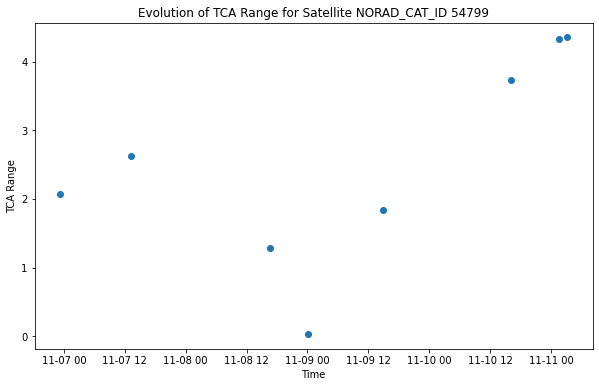

Number of conjunctions for Satellite NORAD_CAT_ID 54799 over the last 5 days: 8


In [50]:
analyze_satellite_evolution(merged_data, NORAD_CAT_ID = 54799, num_days = 5 )

# Findings 

Total Number of conjunctions is 67605.

NORAD_CAT_ID 32788 (IHOPSAT-TD [+]) has the most number of conjunctions occured; 161 as primary object.

NORAD_CAT_ID 15331 (STARLINK-1752 [+])has the most number of conjunctions occured; 177 as secondary object.

STARLINK-5421 - FENGYUN 1C DEB has the highest probability of conjunction with a probability of 0.031750. OPS 5712 (P/L 160) - OPS 5712 (P/L 160) has the lowest probaility of conjunction with a probability of 2.788000e-08.

The satelites under the ownership of US have involved in most number of conjunctions.

Starlink satelites involves in 63.02% of total conjunctions.

Starlink satelites involves 45.8% of total conjunctions as a primary object and 17.9% as a secondary object.
